In [2]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import os
import pandas as pd
import scipy.stats as st
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [10]:
Data_Path = "Data/Video_Games_Sales_Data.csv"
Video_Game_Data = pd.read_csv(Data_Path)
Video_Game_Data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [11]:
print('number of platforms in this dataset:', Video_Game_Data['Platform'].nunique())
print('number of genres in this dataset:', Video_Game_Data ['Genre'].nunique())
print('number of publishers in this dataset:',  Video_Game_Data['Publisher'].nunique())
print('number of games in this dataset:',  Video_Game_Data['Name'].nunique())

number of platforms in this dataset: 31
number of genres in this dataset: 12
number of publishers in this dataset: 627
number of games in this dataset: 12080


In [12]:
#  year_of_release 
Data = Video_Game_Data.groupby(['Year_of_Release'])
Total_NA_Sales = Data["NA_Sales"].sum()
Total_EU_Sales = Data["EU_Sales"].sum()
Total_JP_Sales = Data["JP_Sales"].sum()
df = pd.DataFrame({"North America":Total_NA_Sales, "Europe":Total_EU_Sales, "Japan":Total_JP_Sales}) 
df

,North America,Europe,Japan
Year_of_Release,,,
1976.0,0.41,0.03,0.00
1977.0,1.86,0.11,0.00
1978.0,3.05,0.18,0.00
1979.0,0.29,0.02,0.00
1980.0,13.91,0.88,0.00
1981.0,33.40,1.96,0.00
1982.0,27.36,1.68,0.00
1983.0,8.01,0.82,8.10
1984.0,33.28,2.10,14.27


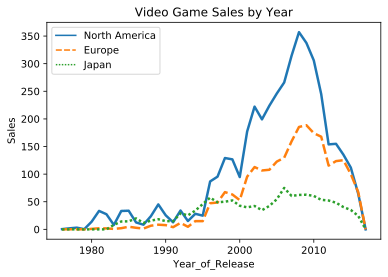

In [13]:
sns.lineplot(data = df, linewidth=2.5)
plt.ylabel('Sales')
plt.title('Video Game Sales by Year')
plt.savefig('Sales_Year.png')

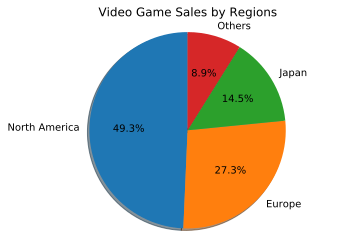

In [14]:
sales_region = Video_Game_Data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().tolist()
pie_labels = 'North America', 'Europe', 'Japan', 'Others'
fig, ax = plt.subplots()
ax.pie(sales_region, labels=pie_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.title('Video Game Sales by Regions')
plt.savefig('Sales_Region.png')